In [ ]:
"""No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), 
Urea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, 
Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, 
Non-Diabetic, or Predict-Diabetic)."""

"No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), \nUrea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, \nTriglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, \nNon-Diabetic, or Predict-Diabetic)."

In [ ]:
#Regular EDA(Exploratory Data Analysis) & Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Dataset of Diabetes .csv')
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [ ]:
df['CLASS'].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [ ]:
Le = LabelEncoder()
df['CLASS']=Le.fit_transform(df['CLASS'])

In [ ]:
df['CLASS'].value_counts()

3    840
0    102
2     53
4      4
1      1
Name: CLASS, dtype: int64

In [ ]:
df['CLASS'] = df['CLASS'].replace([4],1)
df['CLASS'] = df['CLASS'].replace([1],0)

In [ ]:
df['CLASS'].value_counts()

3    840
0    107
2     53
Name: CLASS, dtype: int64

In [ ]:
df['CLASS'] = df['CLASS'].replace([3],'Y')
df['CLASS'] = df['CLASS'].replace([0],'N')
df['CLASS'] = df['CLASS'].replace([2],'P')

In [ ]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,N
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,N
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,N


In [ ]:
df.drop('ID',axis=1,inplace=True)
df.drop('No_Pation',axis=1,inplace=True)

In [ ]:
df.isna().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

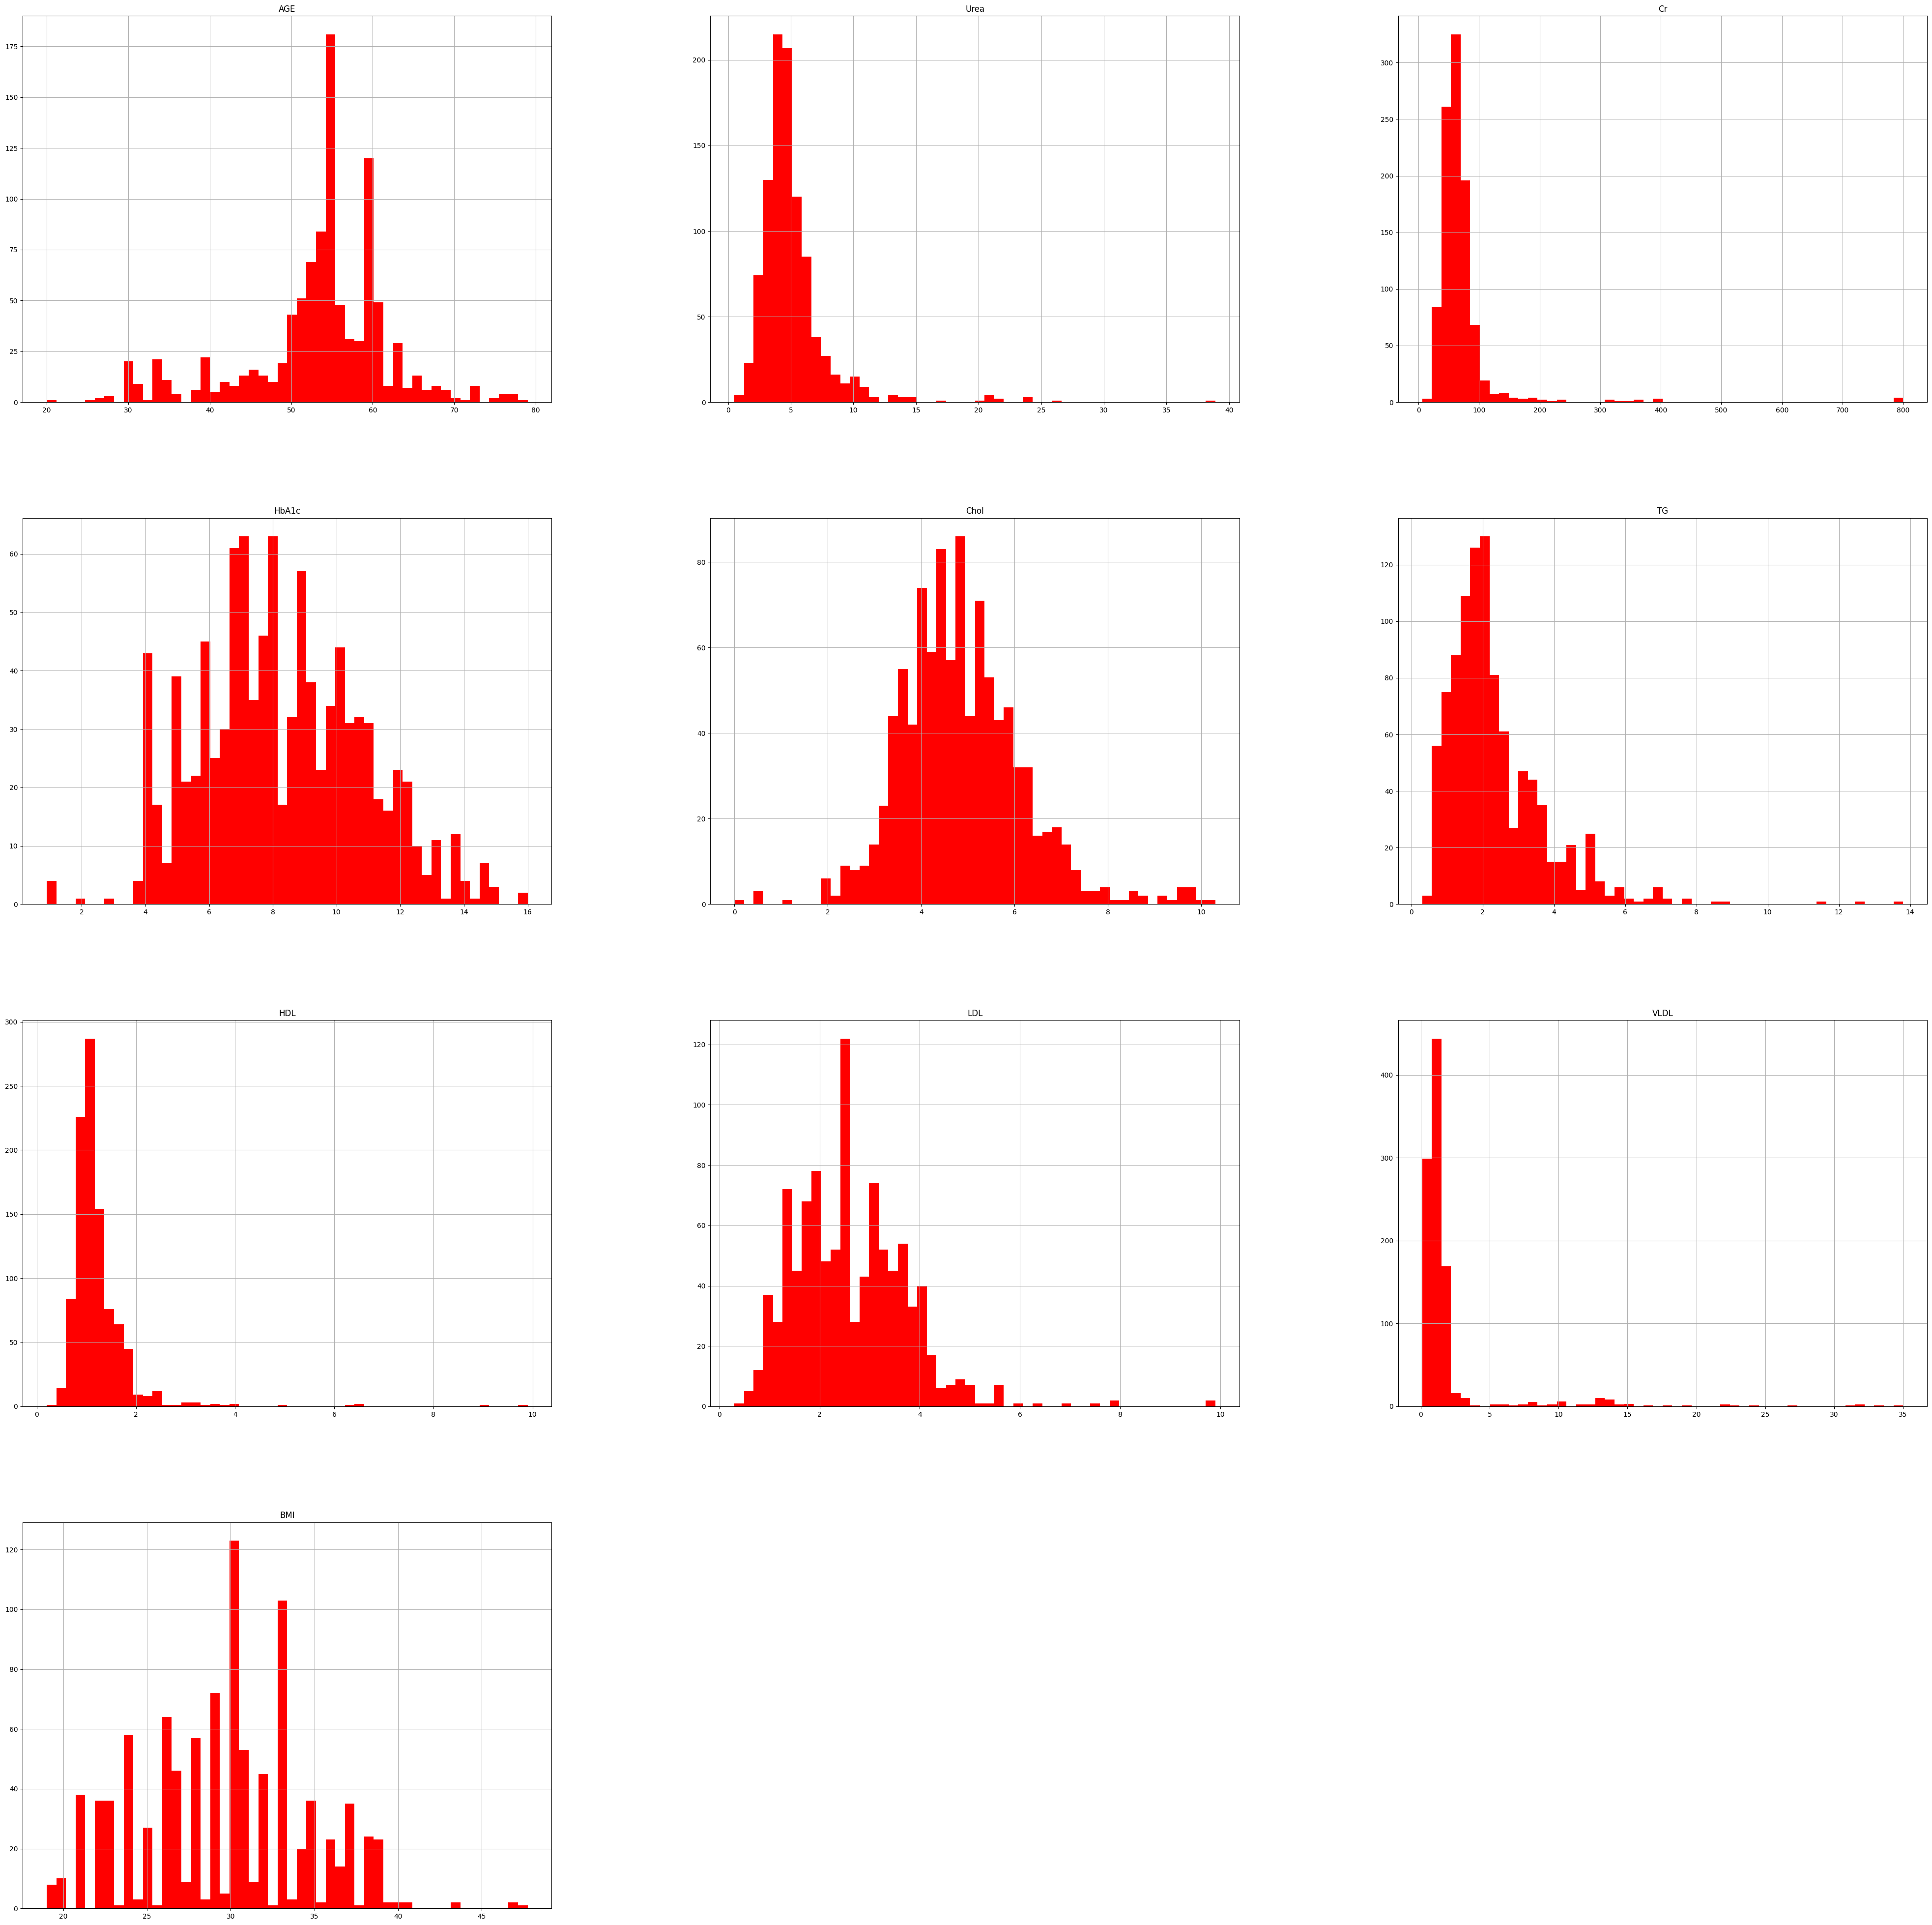

In [ ]:
df.hist(figsize=(50,50), bins=50, color="red");

<Axes: >

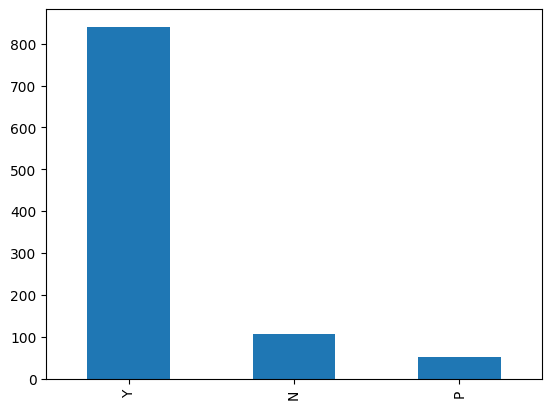

In [ ]:
df['CLASS'].value_counts().plot(kind='bar')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   object 
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 93.9+ KB


In [ ]:
Urea_i = []
y=0

for i in df['Urea']:
  if i>12:
    Urea_i.append(y)

  y+=1

In [ ]:
HbA1c_i = []
y=0

for i in df['HbA1c']:
  if i<3:
    HbA1c_i.append(y)
  if i>15:
    HbA1c_i.append(y)
  y+=1

In [ ]:
Chol_i = []
y = 0

for i in df['Chol']:
  if i<1:
    Chol_i.append(y)
  if i>9:
    Chol_i.append(y)
  y+=1

In [ ]:
TG_i = []
y = 0

for i in df['TG']:
  if i>7:
    TG_i.append(y)
  y+=1

In [ ]:
HDL_i = []
y=0

for i in df['HDL']:
  if i>3:
    HDL_i.append(y)
  y+=1

In [ ]:
LDL_i = []
y=0

for i in df['LDL']:
  if i>6:
    LDL_i.append(y)
  y+=1

In [ ]:
VLDL_i = []
y=0

for i in df['VLDL']:
  if i>4:
    VLDL_i.append(y)
  
  y+=1

In [ ]:
Urea_i = set(Urea_i)
HbA1c_i = set(HbA1c_i)
Chol_i = set(Chol_i)
TG_i = set(TG_i)
HDL_i = set(HDL_i)
LDL_i = set(LDL_i)
VLDL_i = set(VLDL_i)

In [ ]:
Urea_i = Urea_i-HbA1c_i
Urea_i = Urea_i-Chol_i
Urea_i = Urea_i-TG_i
Urea_i = Urea_i-HDL_i
Urea_i = Urea_i-LDL_i
Urea_i = Urea_i-VLDL_i

In [ ]:
HbA1c_i = HbA1c_i - Chol_i
HbA1c_i = HbA1c_i - TG_i
HbA1c_i = HbA1c_i - HDL_i
HbA1c_i = HbA1c_i - LDL_i
HbA1c_i = HbA1c_i - VLDL_i

In [ ]:
Chol_i = Chol_i - TG_i
Chol_i = Chol_i - HDL_i
Chol_i = Chol_i - LDL_i
Chol_i = Chol_i - VLDL_i

In [ ]:
TG_i = TG_i - HDL_i
TG_i = TG_i - LDL_i
TG_i = TG_i - VLDL_i

In [ ]:
HDL_i = HDL_i - LDL_i
HDL_i = HDL_i - VLDL_i

In [ ]:
LDL_i = LDL_i-VLDL_i

In [ ]:
df.drop(Urea_i,axis=0,inplace=True)
df.drop(HbA1c_i,axis=0,inplace=True)
df.drop(Chol_i,axis=0,inplace=True)
df.drop(TG_i,axis=0,inplace=True)
df.drop(HDL_i,axis=0,inplace=True)
df.drop(LDL_i,axis=0,inplace=True)
df.drop(VLDL_i,axis=0,inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
Class_cols = list(df['CLASS'].unique())

In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['CLASS']]).toarray())
encoder_len = len(encoder_df.columns)
encoder_df
#merge one-hot encoded columns back with original DataFrame
df_1 = df.join(encoder_df)

df_1.drop('CLASS', axis=1, inplace=True)

cols = list(df_1.columns)
for i in range(0,encoder_len):
    cols.remove(i)
df_1.columns = cols + Class_cols

In [ ]:
df_1

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,N,P,Y
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1.0,0.0,0.0
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1.0,0.0,0.0
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1.0,0.0,0.0
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1.0,0.0,0.0
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,M,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,0.0,0.0,1.0
867,M,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,0.0,0.0,1.0
868,M,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,0.0,0.0,1.0
869,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,0.0,0.0,1.0


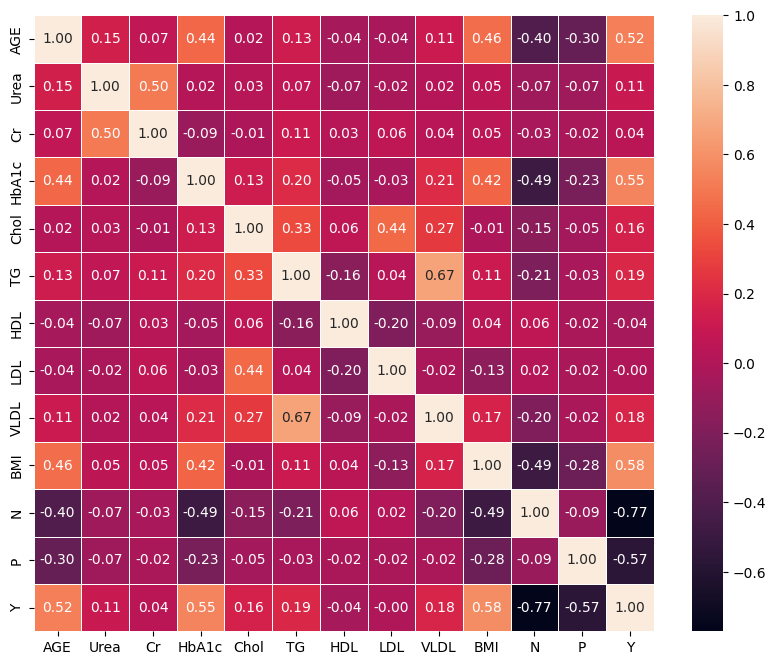

In [ ]:
corr_matrix = df_1.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

In [ ]:
df_2 = df_1.drop("P",axis=1)
df_2 = df_2.drop("Y",axis=1)

df_3 = df_1.drop('N',axis=1)
df_3 = df_3.drop('Y',axis=1)

df_4 = df_1.drop('N',axis=1)
df_4 = df_4.drop('P',axis=1)

<Axes: title={'center': 'Correlation with Diabetes Prediction'}>

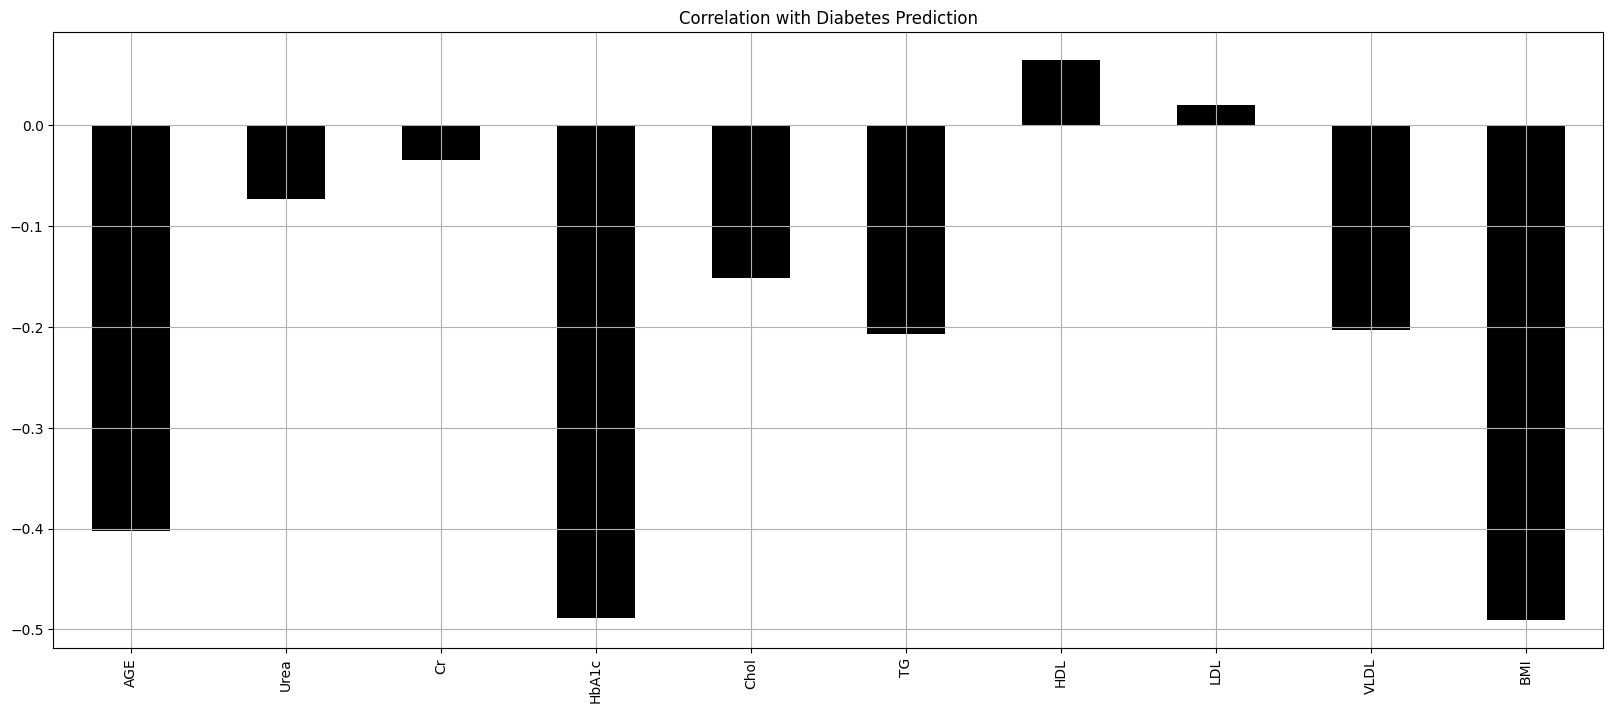

In [ ]:
df_2.drop('N', axis=1).corrwith(df_2.N).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Prediction",color="Black")

<Axes: title={'center': 'Correlation with Diabetes Prediction'}>

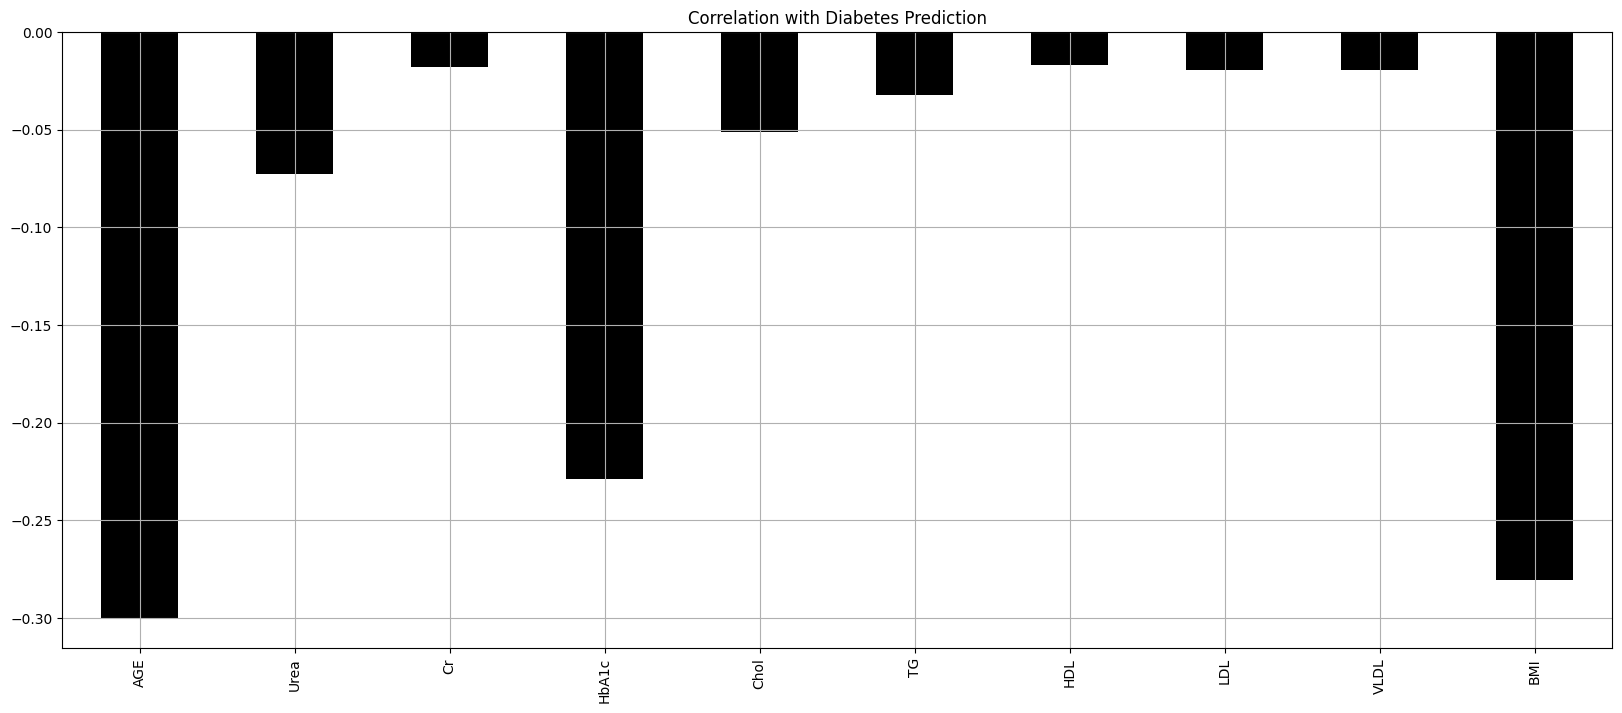

In [ ]:
df_3.drop('P', axis=1).corrwith(df_3.P).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Prediction",color="Black")

<Axes: title={'center': 'Correlation with Diabetes Prediction'}>

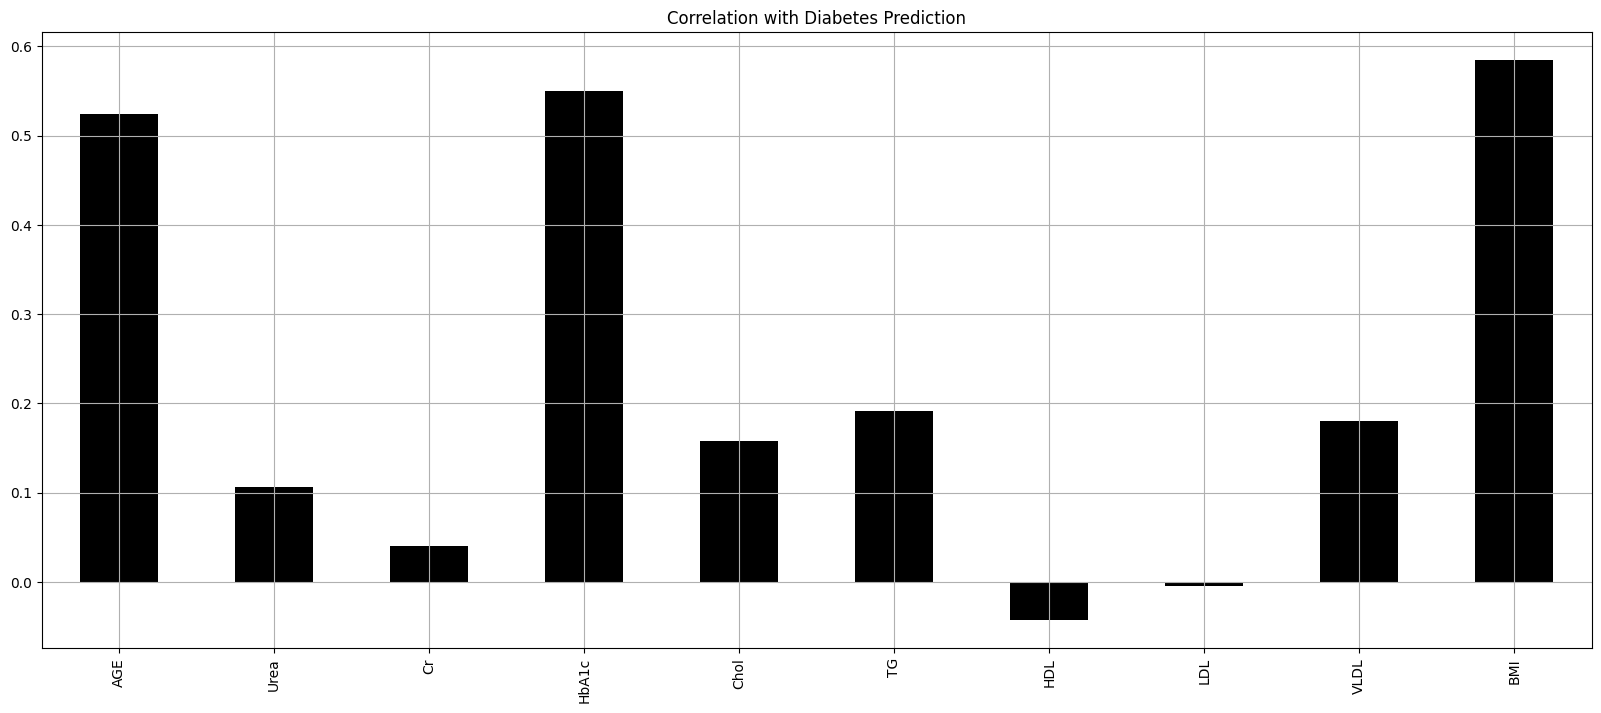

In [ ]:
df_4.drop('Y', axis=1).corrwith(df_4.Y).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Prediction",color="Black")

In [ ]:
df.drop('Cr',axis=1,inplace=True)
df.drop('LDL',axis=1,inplace=True)

In [ ]:
Y = df['CLASS']
df.drop('CLASS',axis=1,inplace=True)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
X_train.head()

,Gender,AGE,Urea,HbA1c,Chol,TG,HDL,VLDL,BMI
577,M,55,5.2,5.5,5.9,2.0,0.8,0.9,30.0
836,M,60,10.0,7.1,4.6,1.6,0.8,1.7,26.0
673,M,53,5.9,9.9,5.2,1.8,0.9,0.6,33.0
668,M,52,6.0,10.5,5.7,3.6,1.0,2.0,30.0
833,F,28,3.5,8.5,5.6,2.1,0.9,0.4,26.0


<Axes: >

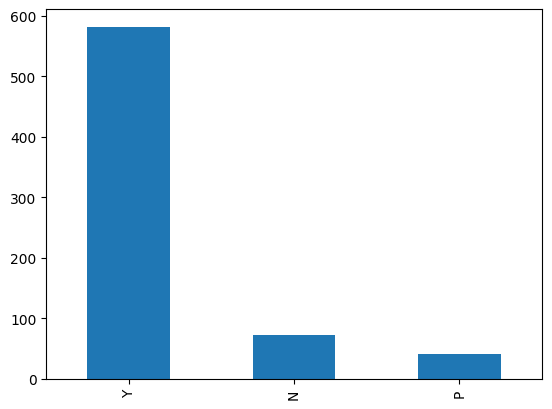

In [ ]:
Y_train.value_counts().plot(kind='bar')

<Axes: >

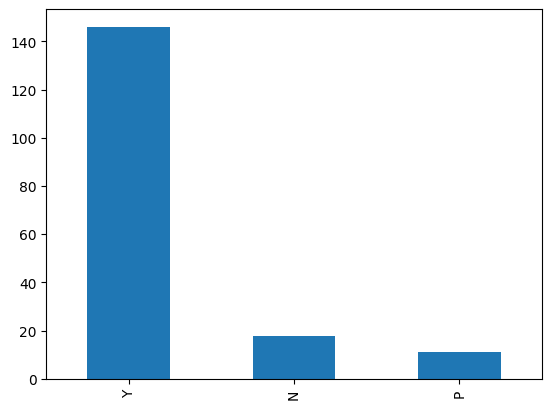

In [ ]:
Y_test.value_counts().plot(kind='bar')

In [ ]:
Y_trains=[]

for i in Y_train:
  if i=='Y':
    Y_trains.append(2)
  elif i=='P':
    Y_trains.append(1)
  else:
    Y_trains.append(0)

In [ ]:
Y_tests = []

for i in Y_test:
  if i=='Y':
    Y_tests.append(2)
  elif i=='P':
    Y_tests.append(1)
  else:
    Y_tests.append(0)

In [ ]:
Y_train = np.array(Y_trains)
Y_train = tf.constant(Y_train)

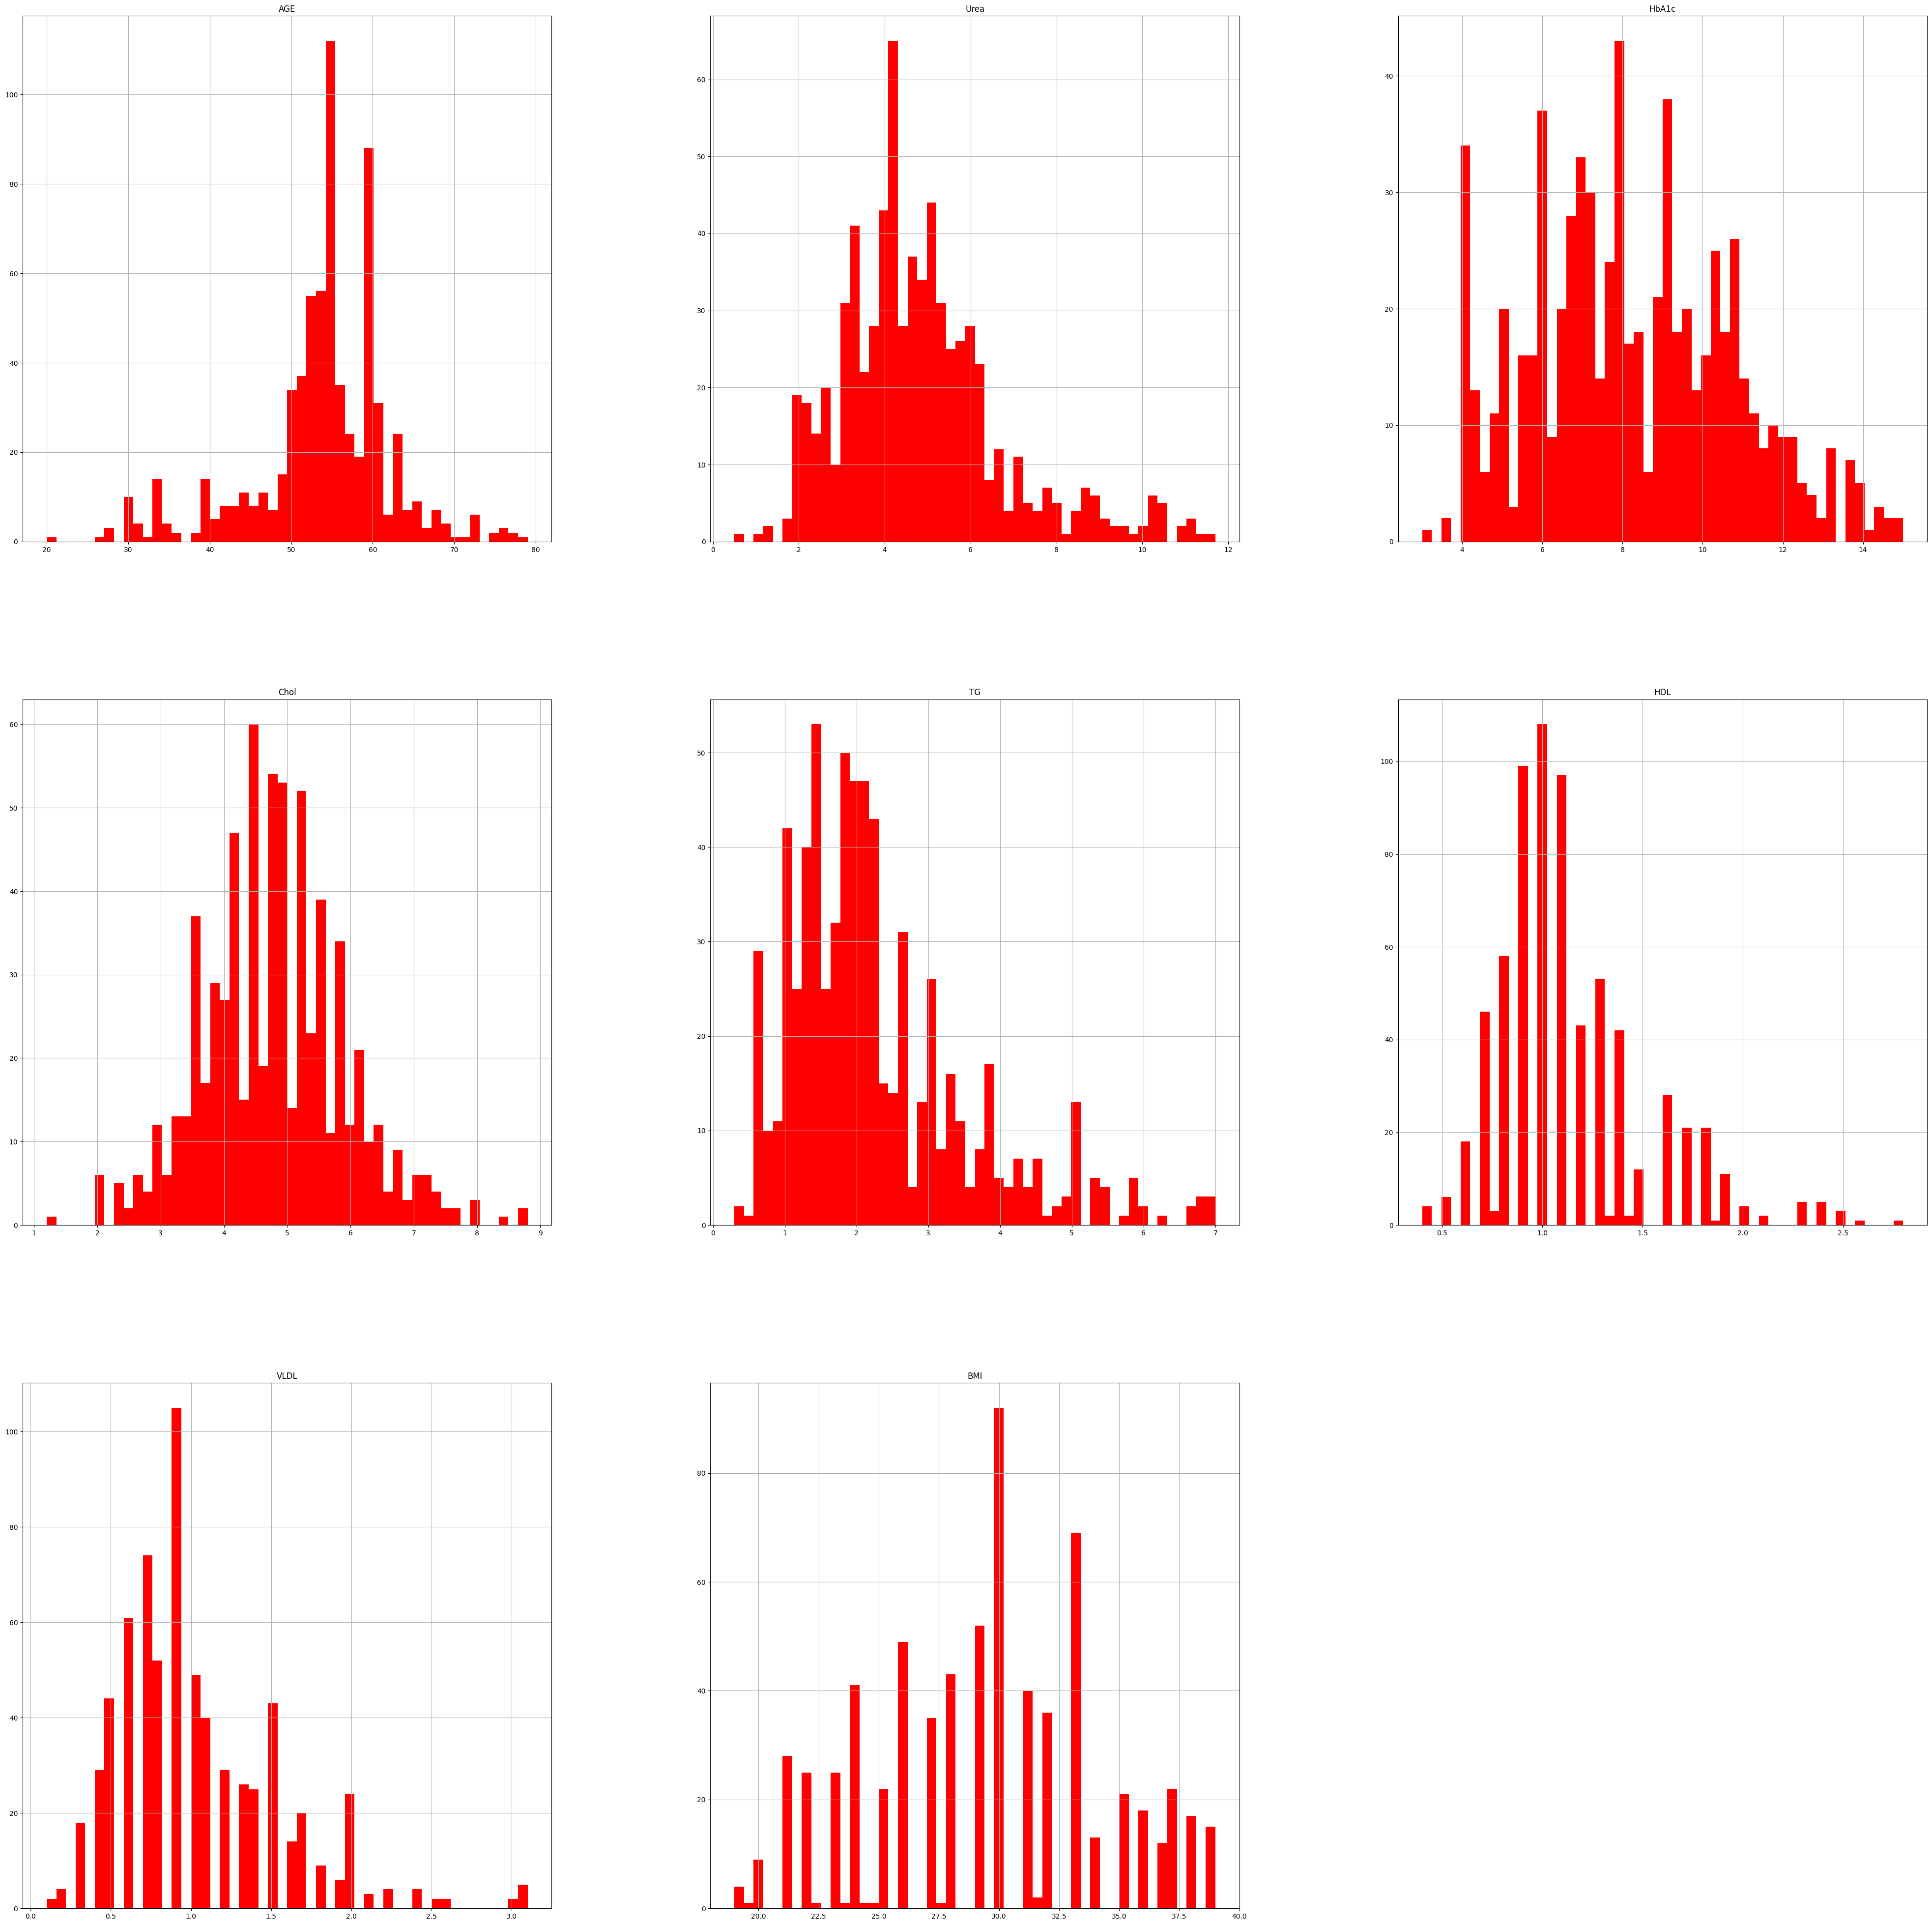

In [ ]:
X_train.hist(figsize=(50,50), bins=50, color="red");

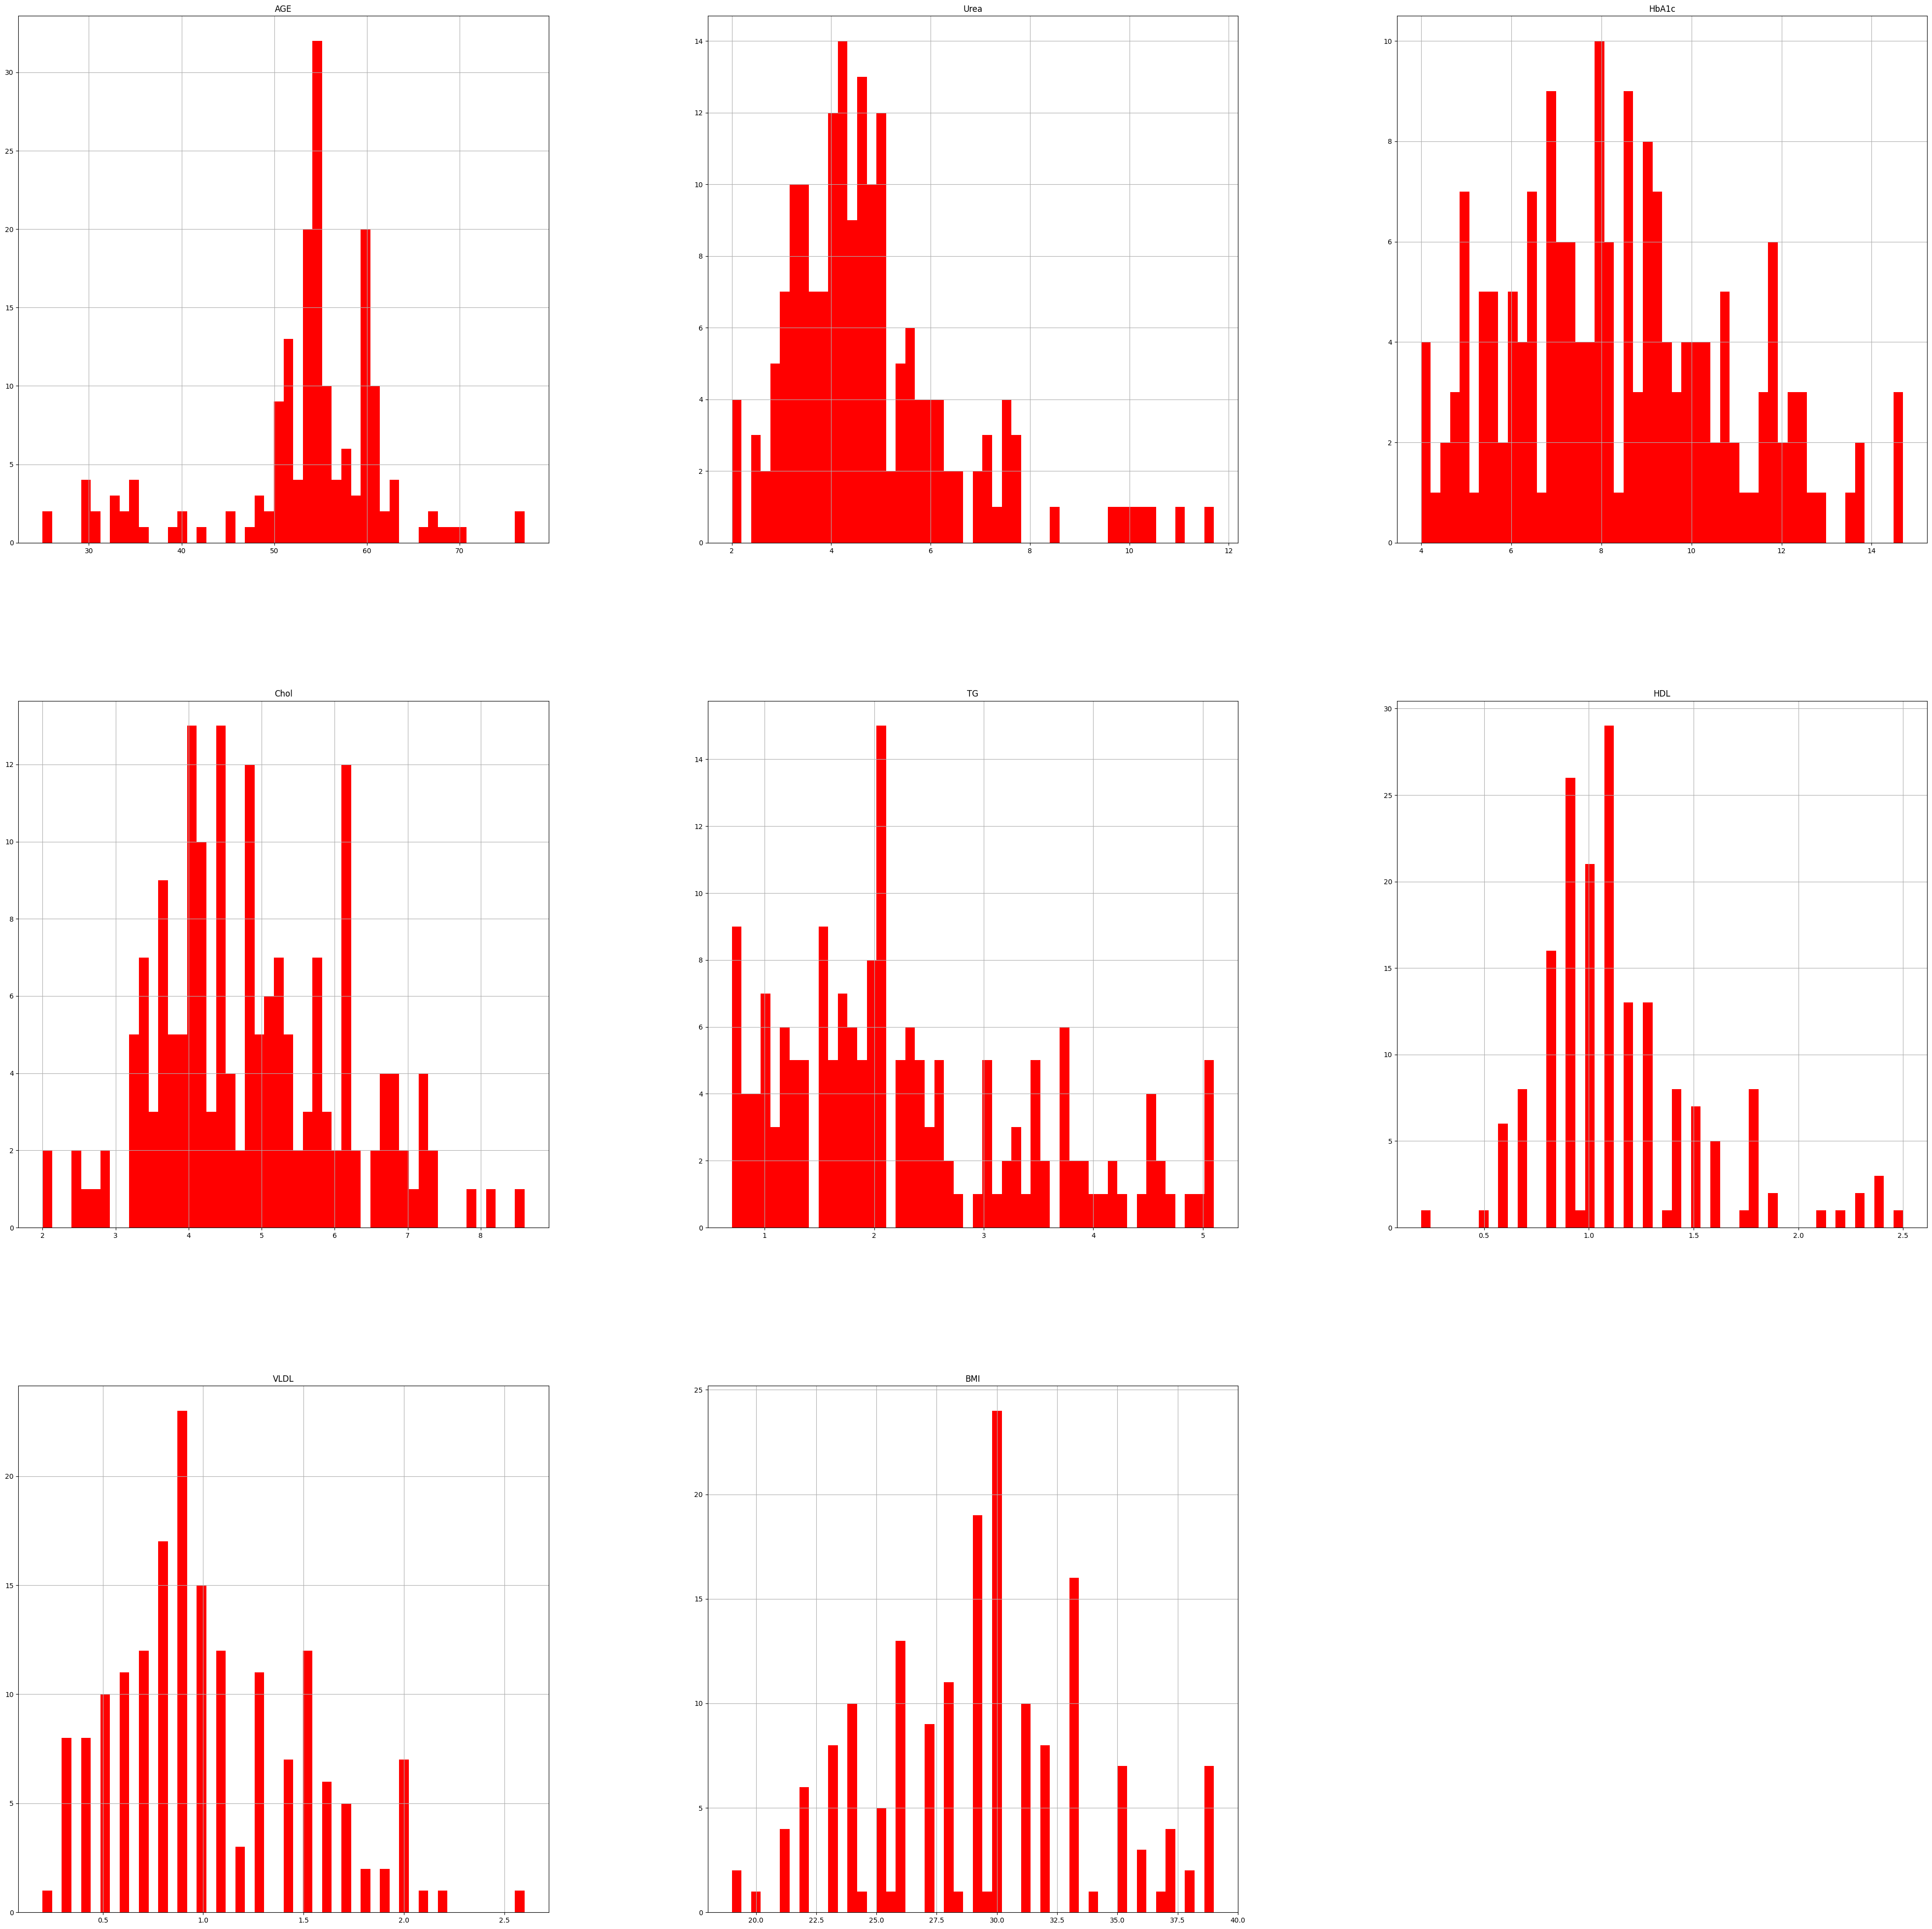

In [ ]:
X_test.hist(figsize=(50,50), bins=50, color="red");

In [ ]:
columns = list(df.columns)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 577 to 466
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  696 non-null    object 
 1   AGE     696 non-null    int64  
 2   Urea    696 non-null    float64
 3   HbA1c   696 non-null    float64
 4   Chol    696 non-null    float64
 5   TG      696 non-null    float64
 6   HDL     696 non-null    float64
 7   VLDL    696 non-null    float64
 8   BMI     696 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 54.4+ KB


In [ ]:
columns.remove('Gender')

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), columns),
    (OneHotEncoder(handle_unknown='ignore'),['Gender']))

In [ ]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL',
                                  'VLDL', 'BMI']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender'])])

In [ ]:
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

#Compile the Model
model_2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(lr=0.001), 
    metrics=['accuracy']
)

#Fit the Model
history_2=model_2.fit(X_train_ct,Y_train,epochs=110)

Epoch 1/110
22/22 [==============================] - 1s 2ms/step - loss: 0.9919 - accuracy: 0.6006
Epoch 2/110
22/22 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.8362
Epoch 3/110
22/22 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.8362
Epoch 4/110
22/22 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8362
Epoch 5/110
22/22 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8362
Epoch 6/110
22/22 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8362
Epoch 7/110
22/22 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8362
Epoch 8/110
22/22 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8362
Epoch 9/110
22/22 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8434
Epoch 10/110
22/22 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8606
Epoch 11/

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

#Compile the Model
model_3.compile(
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#Fit the Model
history_3=model_3.fit(X_train_ct,Y_train,epochs=110)

Epoch 1/110
22/22 [==============================] - 2s 7ms/step - loss: 0.5943 - accuracy: 0.8075
Epoch 2/110
22/22 [==============================] - 0s 8ms/step - loss: 0.4396 - accuracy: 0.8362
Epoch 3/110
22/22 [==============================] - 0s 8ms/step - loss: 0.3927 - accuracy: 0.8362
Epoch 4/110
22/22 [==============================] - 0s 7ms/step - loss: 0.3475 - accuracy: 0.8520
Epoch 5/110
22/22 [==============================] - 0s 5ms/step - loss: 0.3138 - accuracy: 0.8736
Epoch 6/110
22/22 [==============================] - 0s 6ms/step - loss: 0.2847 - accuracy: 0.8879
Epoch 7/110
22/22 [==============================] - 0s 5ms/step - loss: 0.2690 - accuracy: 0.8937
Epoch 8/110
22/22 [==============================] - 0s 6ms/step - loss: 0.2535 - accuracy: 0.8908
Epoch 9/110
22/22 [==============================] - 0s 5ms/step - loss: 0.2480 - accuracy: 0.9009
Epoch 10/110
22/22 [==============================] - 0s 4ms/step - loss: 0.2402 - accuracy: 0.8994
Epoch 11/

In [ ]:
y_pred = model_3.predict(X_test_ct)

6/6 [==============================] - 0s 2ms/step


In [ ]:
Y_Test = tf.constant(Y_tests)

In [ ]:
y_pred = y_pred.argmax(axis=1)

In [ ]:
print(classification_report(Y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.54      0.64      0.58        11
           2       0.98      0.97      0.98       146

    accuracy                           0.93       175
   macro avg       0.78      0.80      0.79       175
weighted avg       0.94      0.93      0.93       175



In [ ]:
model_3.save('Diabetes_new_07.h5')